<a href="https://colab.research.google.com/github/vatsraviya/INSE6220/blob/main/INSE6220_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install PyCaret**

PyCaret is an open-source, low-code machine learning library in Python designed to make the end-to-end machine learning process easier and faster for both beginners and experienced data scientists. It offers a variety of tools and functions for data preparation, model training, model selection, and deployment.

pip3 install pycaret==2.3.6 is a command used to install a specific version of the PyCaret library in Python. If you encounter an error message, try running the code again.

In [13]:
# install slim version (default)
!pip install pycaret

In [14]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.3.2'

**Install Analysis Extras for Explainable AI**

In [15]:
!pip install pycaret[analysis]

## **Principal Component Analysis**

PCA stands for Principal Component Analysis, and it is a widely used technique in data analysis and machine learning for reducing the dimensionality of large datasets. The basic idea behind PCA is to transform a set of high-dimensional variables into a smaller set of uncorrelated variables called principal components, while retaining as much of the original variance as possible.

**Import Libraries**

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.1.4
Seaborn version:  0.13.2


**Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

**Read the dataset**

**pd.read_csv** is a function in the pandas library in Python that is used to read a CSV (Comma Separated Values) file and convert it into a pandas DataFrame.

In [18]:
import pandas as pd

# Correct raw GitHub CSV URL
df = pd.read_csv('https://raw.githubusercontent.com/vatsraviya/INSE6220/refs/heads/main/wine.csv')

df.head(25)

Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0      1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1      1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2      1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3      1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4      1    13.24        2.59  2.87  21.0  118     2.80        2.69   
5      1    14.20        1.76  2.45  15.2  112     3.27        3.39   
6      1    14.39        1.87  2.45  14.6   96     2.50        2.52   
7      1    14.06        2.15  2.61  17.6  121     2.60        2.51   
8      1    14.83        1.64  2.17  14.0   97     2.80        2.98   
9      1    13.86        1.35  2.27  16.0   98     2.98        3.15   
10     1    14.10        2.16  2.30  18.0  105     2.95        3.32   
11     1    14.12        1.48  2.32  16.8   95     2.20        2.43   
12     1    13.75        1.73  2.41  16.0   89     2.60        2.76   
13     1    14.75        1.73  2.39  11.4   91     3.10        3.69   
14     1    14.38        1.87  2.38  12.0  102     3.30        3.64   
15     1    13.63        1.81  2.70  17.2  112     2.85        2.91   
16     1    14.30        1.92  2.72  20.0  120     2.80        3.14   
17     1    13.83        1.57  2.62  20.0  115     2.95        3.40   
18     1    14.19        1.59  2.48  16.5  108     3.30        3.93   
19     1    13.64        3.10  2.56  15.2  116     2.70        3.03   
20     1    14.06        1.63  2.28  16.0  126     3.00        3.17   
21     1    12.93        3.80  2.65  18.6  102     2.41        2.41   
22     1    13.71        1.86  2.36  16.6  101     2.61        2.88   
23     1    12.85        1.60  2.52  17.8   95     2.48        2.37   
24     1    13.50        1.81  2.61  20.0   96     2.53        2.61   

    Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                   0.28     2.29       5.64  1.04  3.92     1065  
1                   0.26     1.28       4.38  1.05  3.40     1050  
2                   0.30     2.81       5.68  1.03  3.17     1185  
3                   0.24     2.18       7.80  0.86  3.45     1480  
4                   0.39     1.82       4.32  1.04  2.93      735  
5                   0.34     1.97       6.75  1.05  2.85     1450  
6                   0.30     1.98       5.25  1.02  3.58     1290  
7                   0.31     1.25       5.05  1.06  3.58     1295  
8                   0.29     1.98       5.20  1.08  2.85     1045  
9                   0.22     1.85       7.22  1.01  3.55     1045  
10                  0.22     2.38       5.75  1.25  3.17     1510  
11                  0.26     1.57       5.00  1.17  2.82     1280  
12                  0.29     1.81       5.60  1.15  2.90     1320  
13                  0.43     2.81       5.40  1.25  2.73     1150  
14                  0.29     2.96       7.50  1.20  3.00     1547  
15                  0.30     1.46       7.30  1.28  2.88     1310  
16                  0.33     1.97       6.20  1.07  2.65     1280  
17                  0.40     1.72       6.60  1.13  2.57     1130  
18                  0.32     1.86       8.70  1.23  2.82     1680  
19                  0.17     1.66       5.10  0.96  3.36      845  
20                  0.24     2.10       5.65  1.09  3.71      780  
21                  0.25     1.98       4.50  1.03  3.52      770  
22                  0.27     1.69       3.80  1.11  4.00     1035  
23                  0.26     1.46       3.93  1.09  3.63     1015  
24                  0.28     1.66       3.52  1.12  3.82      845

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [20]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [21]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

**sns.pairplot** is a function in the seaborn library in Python that is used to plot pairwise relationships between multiple variables in a dataset. The resulting plot is a grid of scatterplots, with each variable plotted against every other variable.

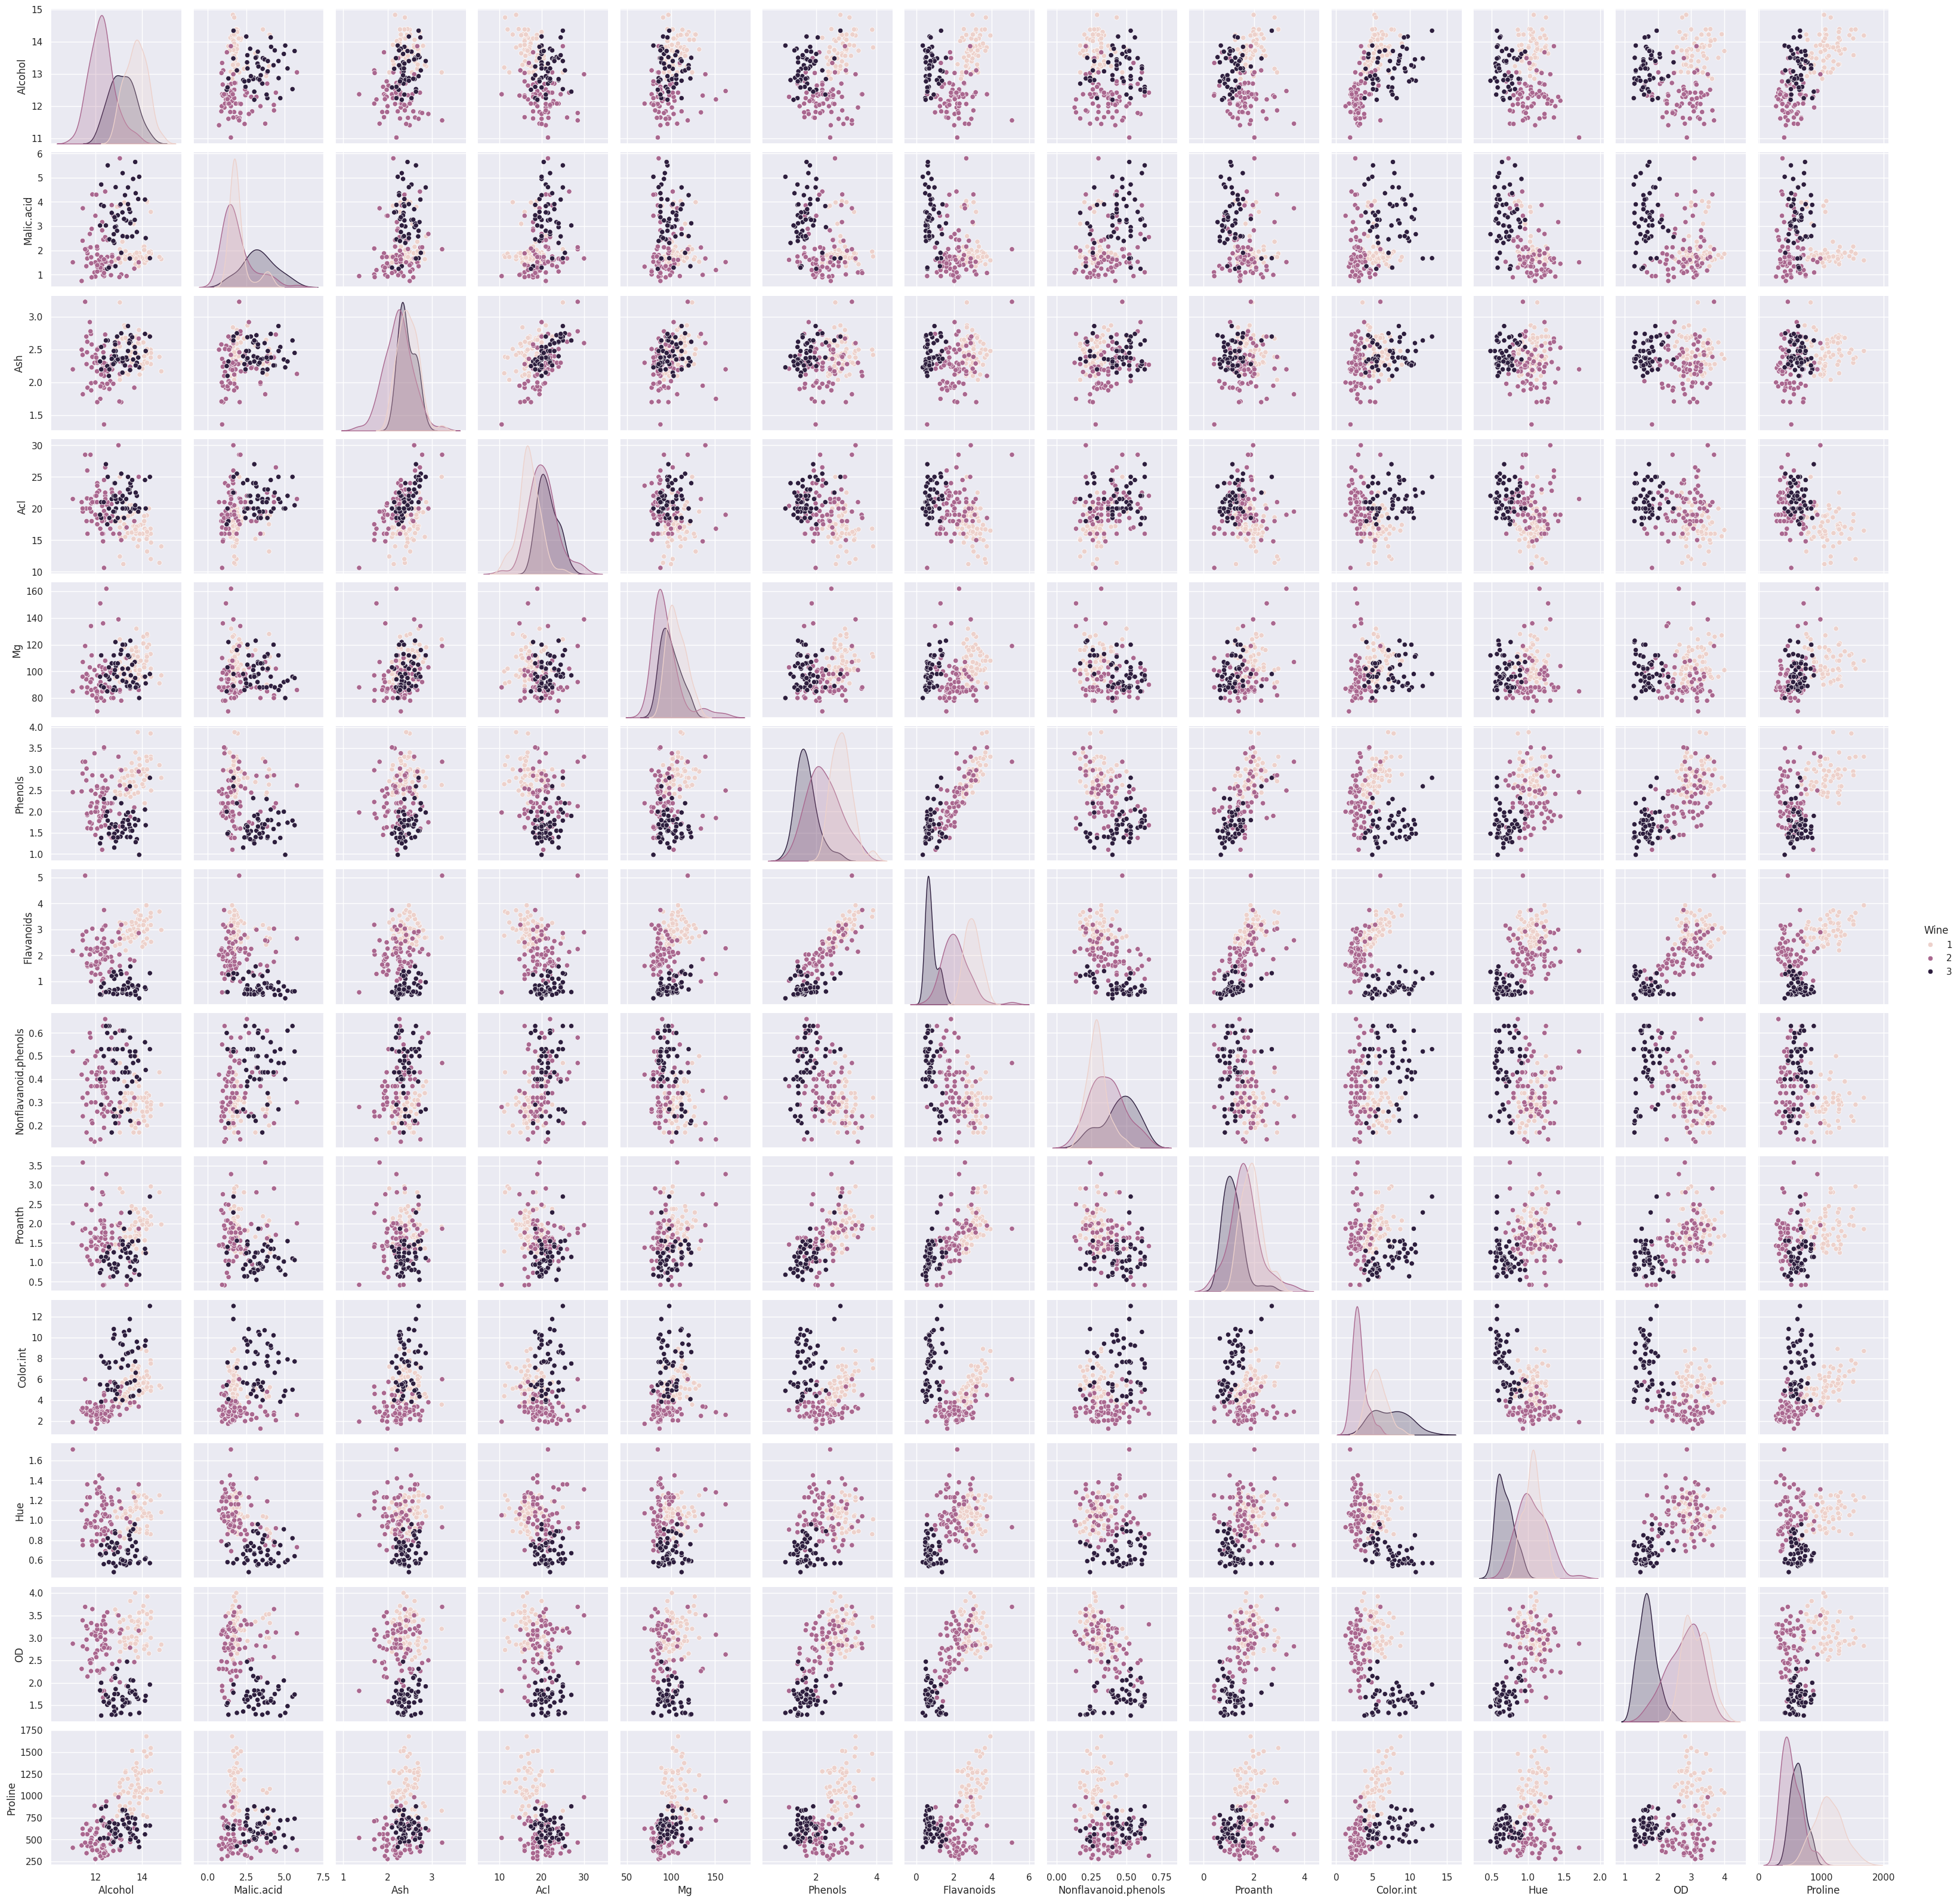

In [22]:
sns.pairplot(df, hue='Wine')
plt.show()

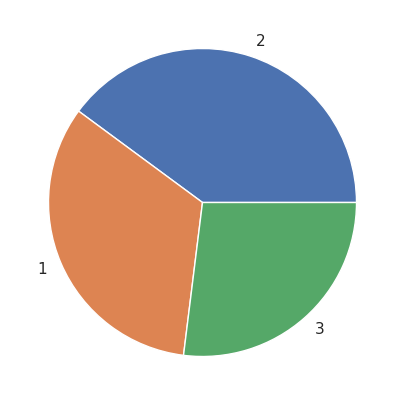

<Figure size 700x500 with 0 Axes>

In [23]:
y =df['Wine']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()
plt.savefig('chart.png')

**Data Matrix**

In [24]:
X = df.drop(columns=['Nonflavanoid.phenols','OD','Malic.acid','Mg','Proanth','Hue','Wine','Ash','Acl'])
X.head(10)

Alcohol  Phenols  Flavanoids  Color.int  Proline
0    14.23     2.80        3.06       5.64     1065
1    13.20     2.65        2.76       4.38     1050
2    13.16     2.80        3.24       5.68     1185
3    14.37     3.85        3.49       7.80     1480
4    13.24     2.80        2.69       4.32      735
5    14.20     3.27        3.39       6.75     1450
6    14.39     2.50        2.52       5.25     1290
7    14.06     2.60        2.51       5.05     1295
8    14.83     2.80        2.98       5.20     1045
9    13.86     2.98        3.15       7.22     1045

In [25]:
X.describe().transpose()

count        mean         std     min       25%      50%  \
Alcohol     178.0   13.000618    0.811827   11.03   12.3625   13.050   
Phenols     178.0    2.295112    0.625851    0.98    1.7425    2.355   
Flavanoids  178.0    2.029270    0.998859    0.34    1.2050    2.135   
Color.int   178.0    5.058090    2.318286    1.28    3.2200    4.690   
Proline     178.0  746.893258  314.907474  278.00  500.5000  673.500   

                 75%      max  
Alcohol      13.6775    14.83  
Phenols       2.8000     3.88  
Flavanoids    2.8750     5.08  
Color.int     6.2000    13.00  
Proline     985.0000  1680.00

**Standardize the Data**

In [26]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Alcohol   Phenols  Flavanoids  Color.int   Proline
0  1.518613  0.808997    1.034819   0.251717  1.013009
1  0.246290  0.568648    0.733629  -0.293321  0.965242
2  0.196879  0.808997    1.215533   0.269020  1.395148
3  1.691550  2.491446    1.466525   1.186068  2.334574
4  0.295700  0.808997    0.663351  -0.319276 -0.037874
5  1.481555  1.562093    1.366128   0.731870  2.239039
6  1.716255  0.328298    0.492677   0.083015  1.729520
7  1.308617  0.488531    0.482637  -0.003499  1.745442
8  2.259772  0.808997    0.954502   0.061386  0.949319
9  1.061565  1.097417    1.125176   0.935177  0.949319

In [27]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Alcohol     178.0 -8.382808e-16  1.002821 -2.434235 -0.788245  0.061000   
Phenols     178.0  0.000000e+00  1.002821 -2.107246 -0.885468  0.095960   
Flavanoids  178.0 -3.991813e-16  1.002821 -1.695971 -0.827539  0.106150   
Color.int   178.0  2.494883e-17  1.002821 -1.634288 -0.795103 -0.159225   
Proline     178.0 -1.596725e-16  1.002821 -1.493188 -0.784638 -0.233720   

                 75%       max  
Alcohol     0.836129  2.259772  
Phenols     0.808997  2.539515  
Flavanoids  0.849085  3.062832  
Color.int   0.493956  3.435432  
Proline     0.758249  2.971473

**Observations and variables**

In [28]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

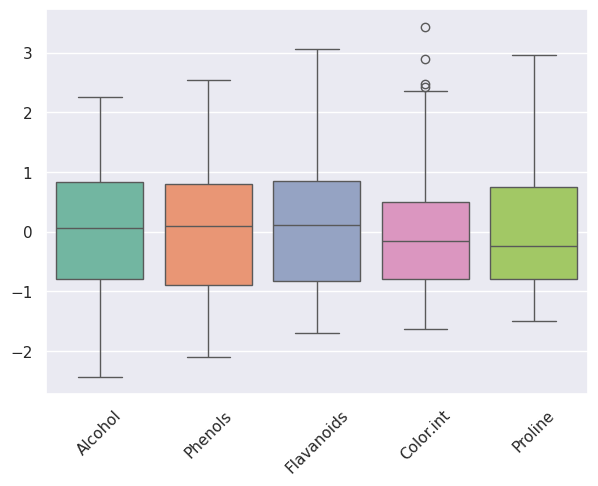

In [29]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

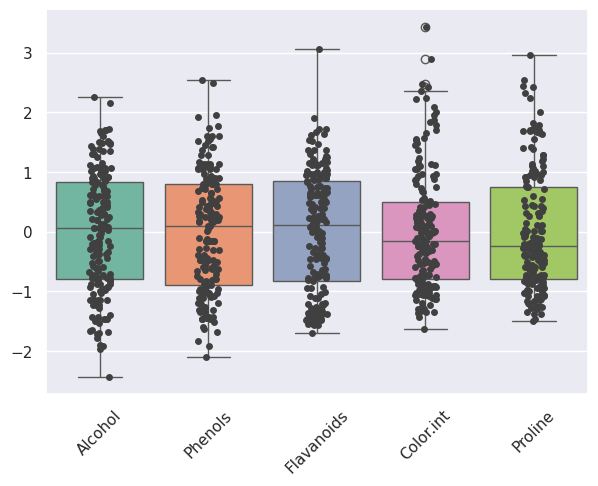

In [30]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

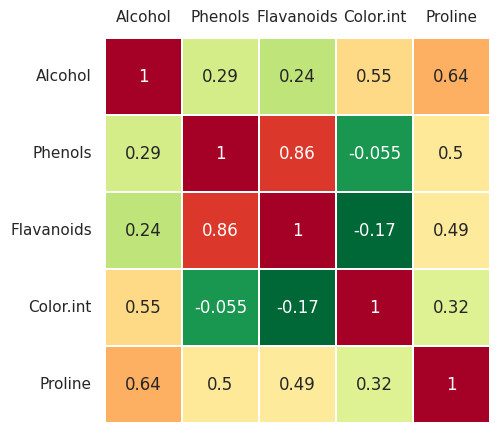

In [31]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.1, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);


#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Applying PCA**

In [32]:
pca = PCA()
Z = pca.fit_transform(X)

idx_1 = np.where(y == 0)
idx_2 = np.where(y == 1)
idx_3 = np.where(y == 2)



# idx_Canadian = np.where(y == 2)

# plt. figure()
# plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
# plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
# # plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
# plt.legend()
# plt.xlabel('$Z_1$')
# plt.ylabel('$Z_2$')

**Eigenvectors**

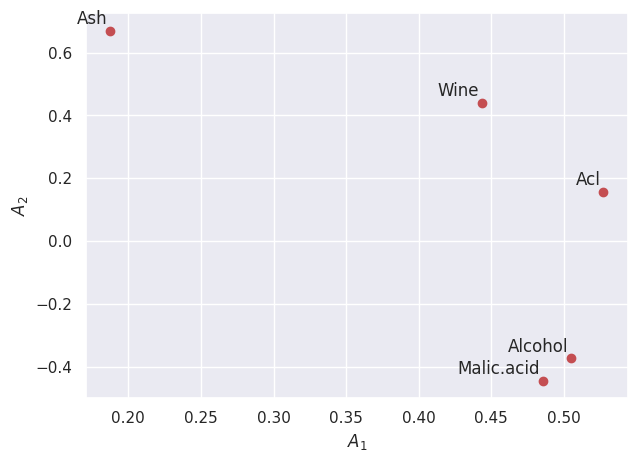

In [33]:
A = pca.components_.T

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

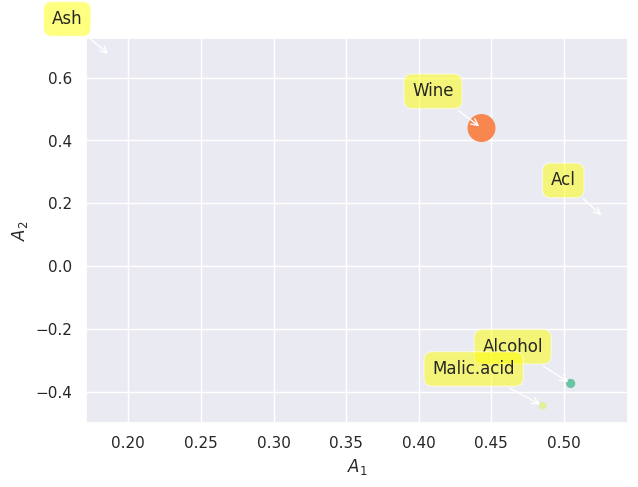

In [34]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

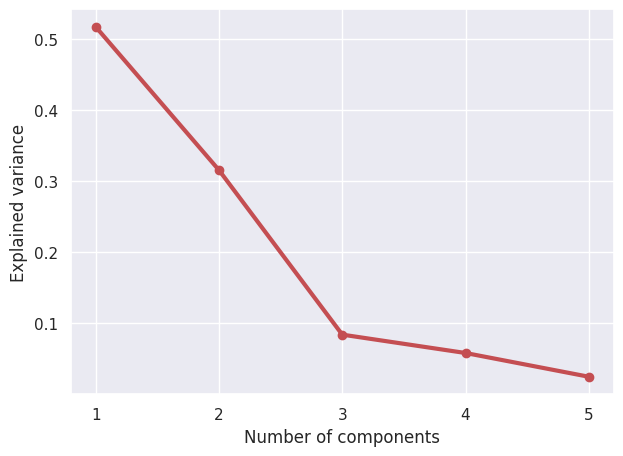

In [35]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

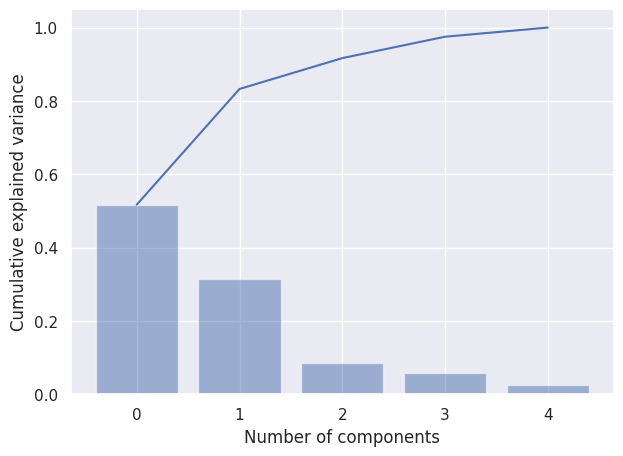

In [36]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

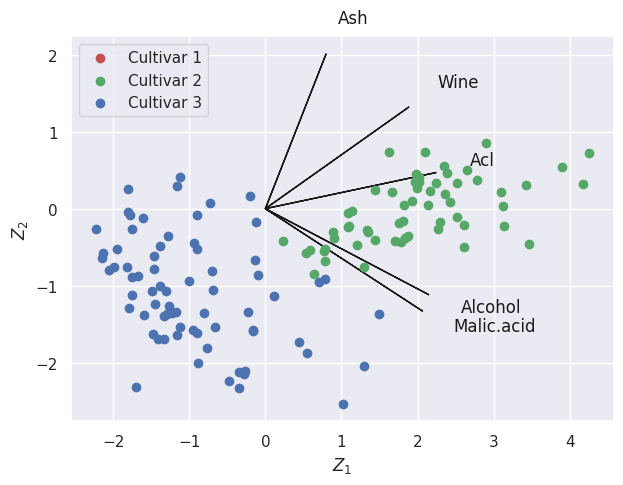

In [38]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label='Cultivar 1')
plt.scatter(Z[idx_2,0], Z[idx_2,1], c='g', label='Cultivar 2')
plt.scatter(Z[idx_3,0], Z[idx_3,1], c='b', label='Cultivar 3')
plt.legend(loc='upper left')

##**Using PCA Library**

In [39]:
!pip install pca

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [40]:
from pca import pca
# Initialize and keep all PCs
model = pca(n_components=0.83)
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [83.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [83.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [41]:
out['PC']

PC1       PC2
0    2.165086  0.234947
1    1.206189 -0.473647
2    1.871654 -0.354705
3    4.172465  0.325573
4    0.781504 -0.684402
..        ...       ...
173 -0.597878  2.144236
174 -0.618016  1.731326
175 -0.510251  2.694400
176 -0.585984  2.350747
177 -0.176128  2.429581

[178 rows x 2 columns]

**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [91.67%] of the variance'}, xlabel='PC1 (51.7% expl.var)', ylabel='PC2 (31.5% expl.var)'>)

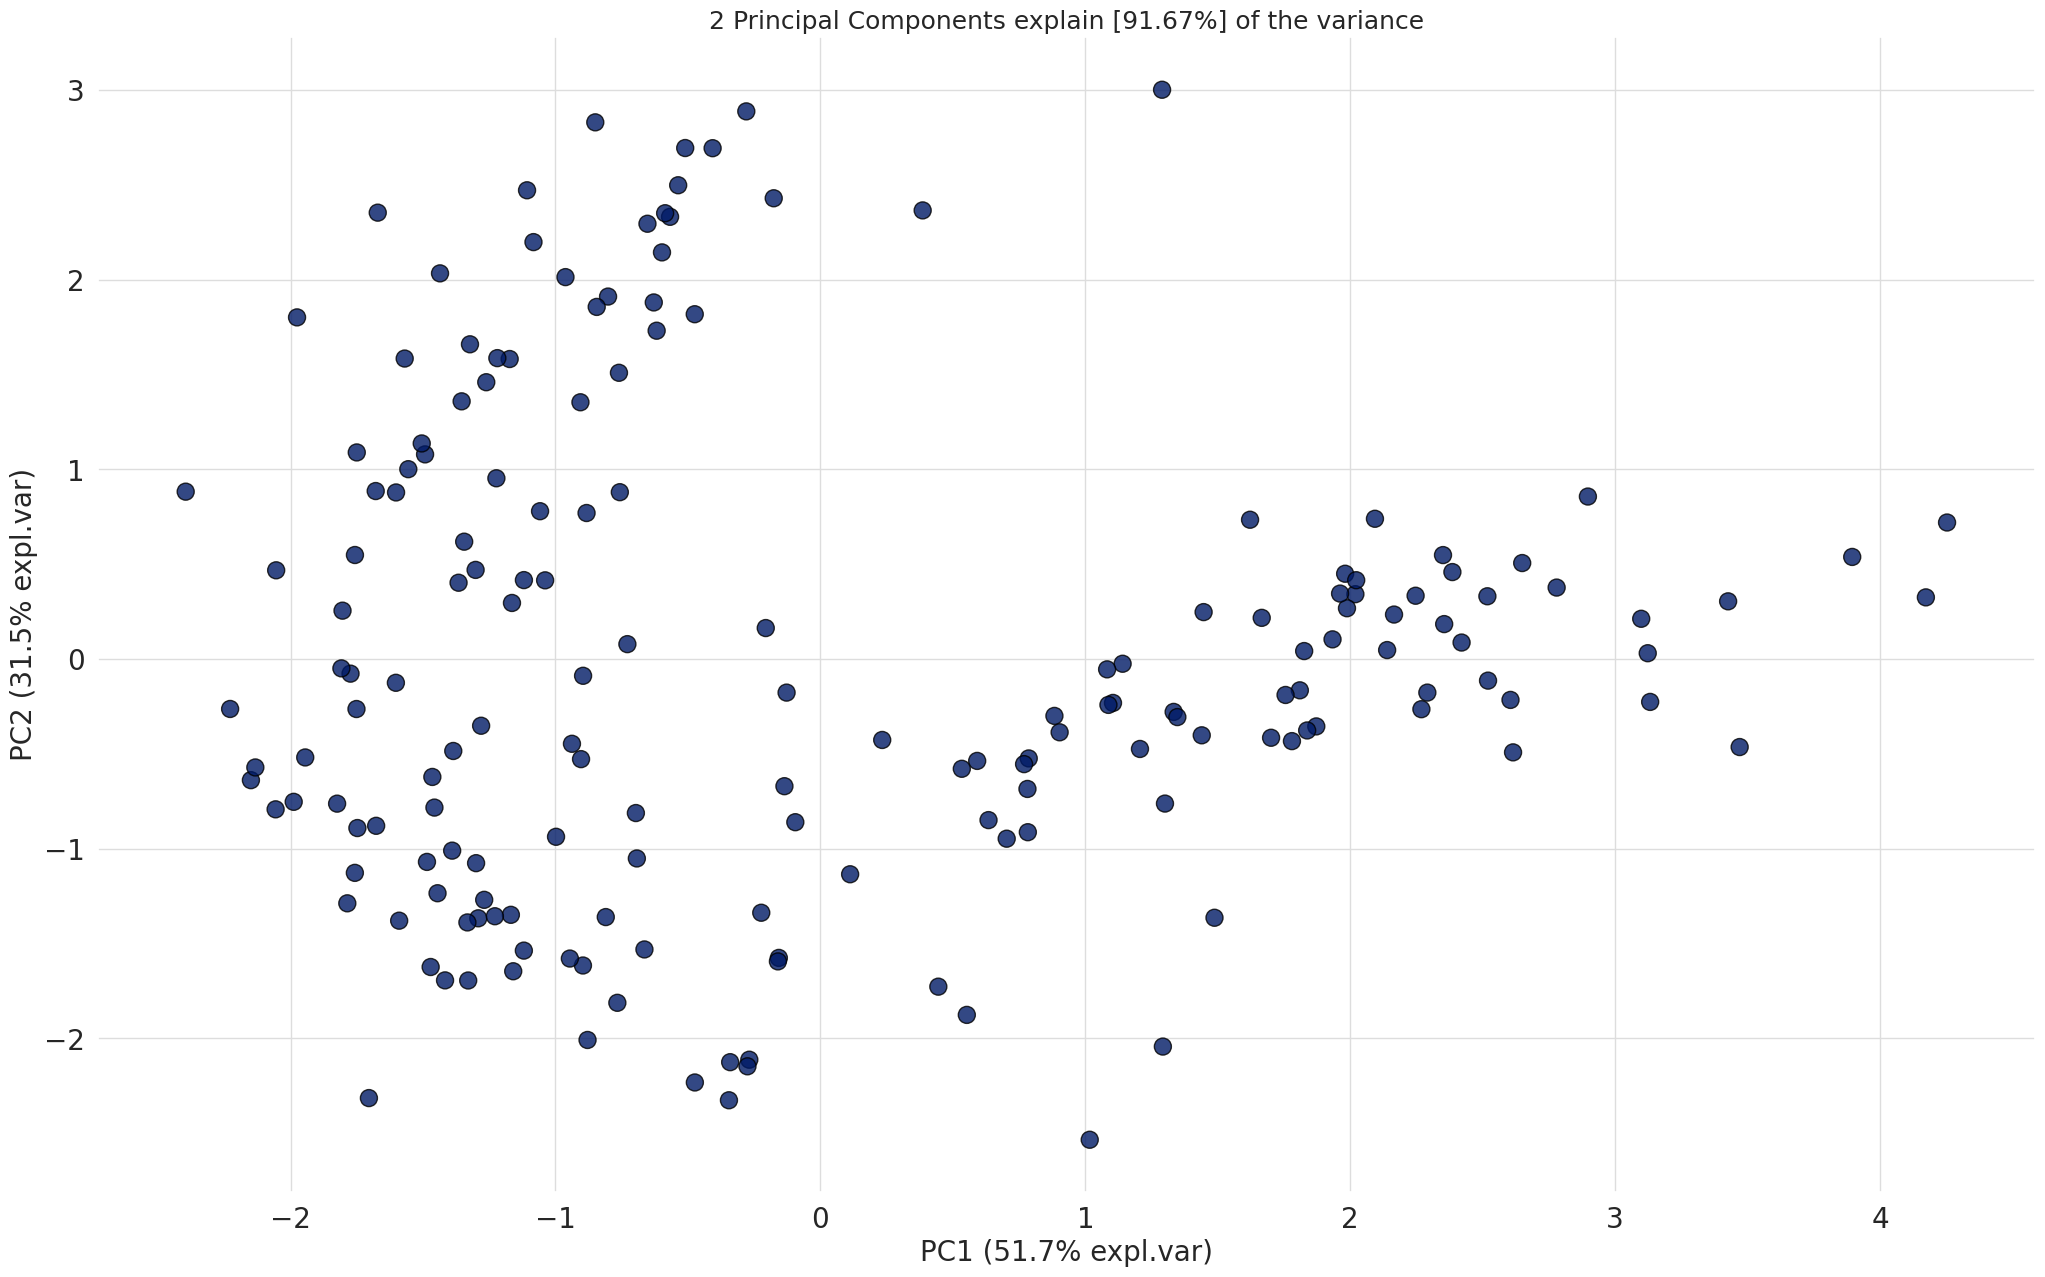

In [42]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [43]:
A = out['loadings'].T

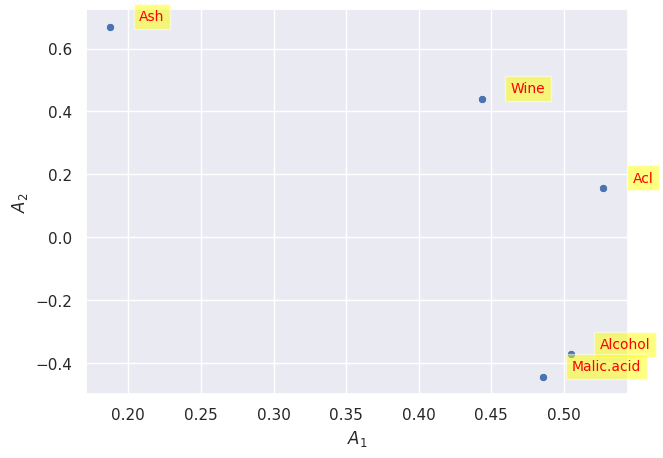

In [44]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

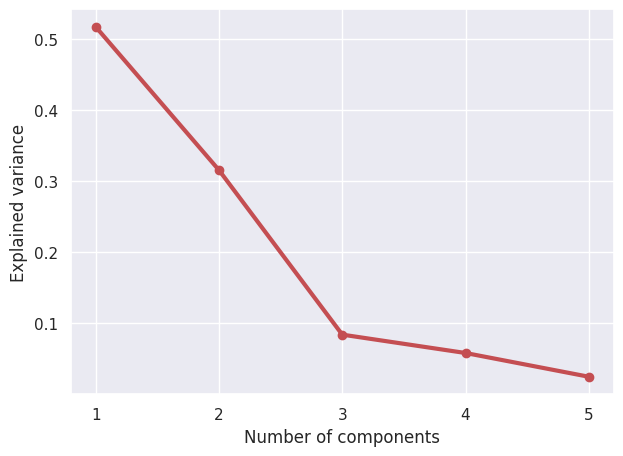

In [45]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

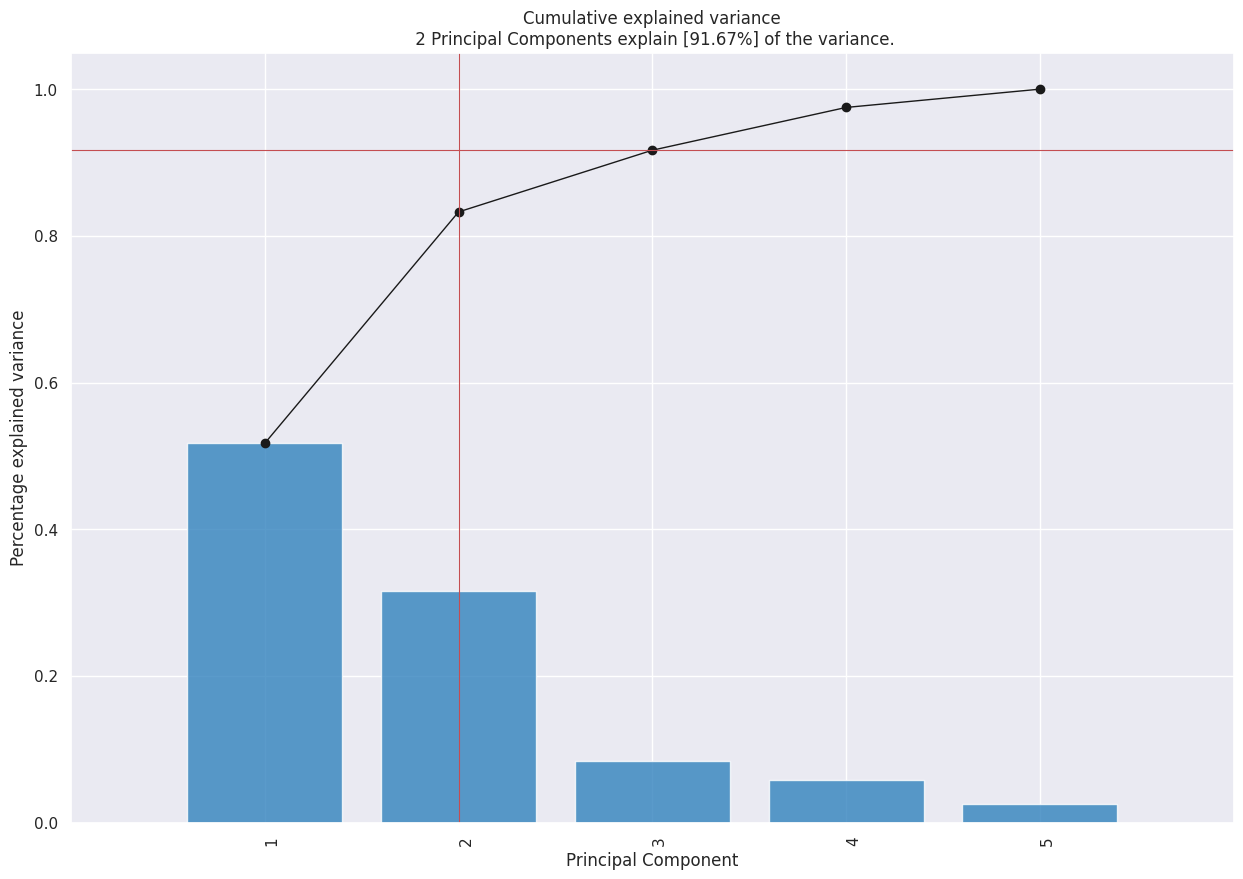

In [46]:
model.plot();

**Biplot**

A biplot is a graphical representation of multivariate data that displays both observations and variables simultaneously in a single plot. Each observation is represented as a point in a two-dimensional plot, while the variables are represented as arrows or vectors that point in the direction of the greatest variation in the data. The length of the vector indicates the magnitude of the variable, while the angle between two vectors reflects their correlation.

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [91.67%] of the variance'}, xlabel='PC1 (51.7% expl.var)', ylabel='PC2 (31.5% expl.var)'>)

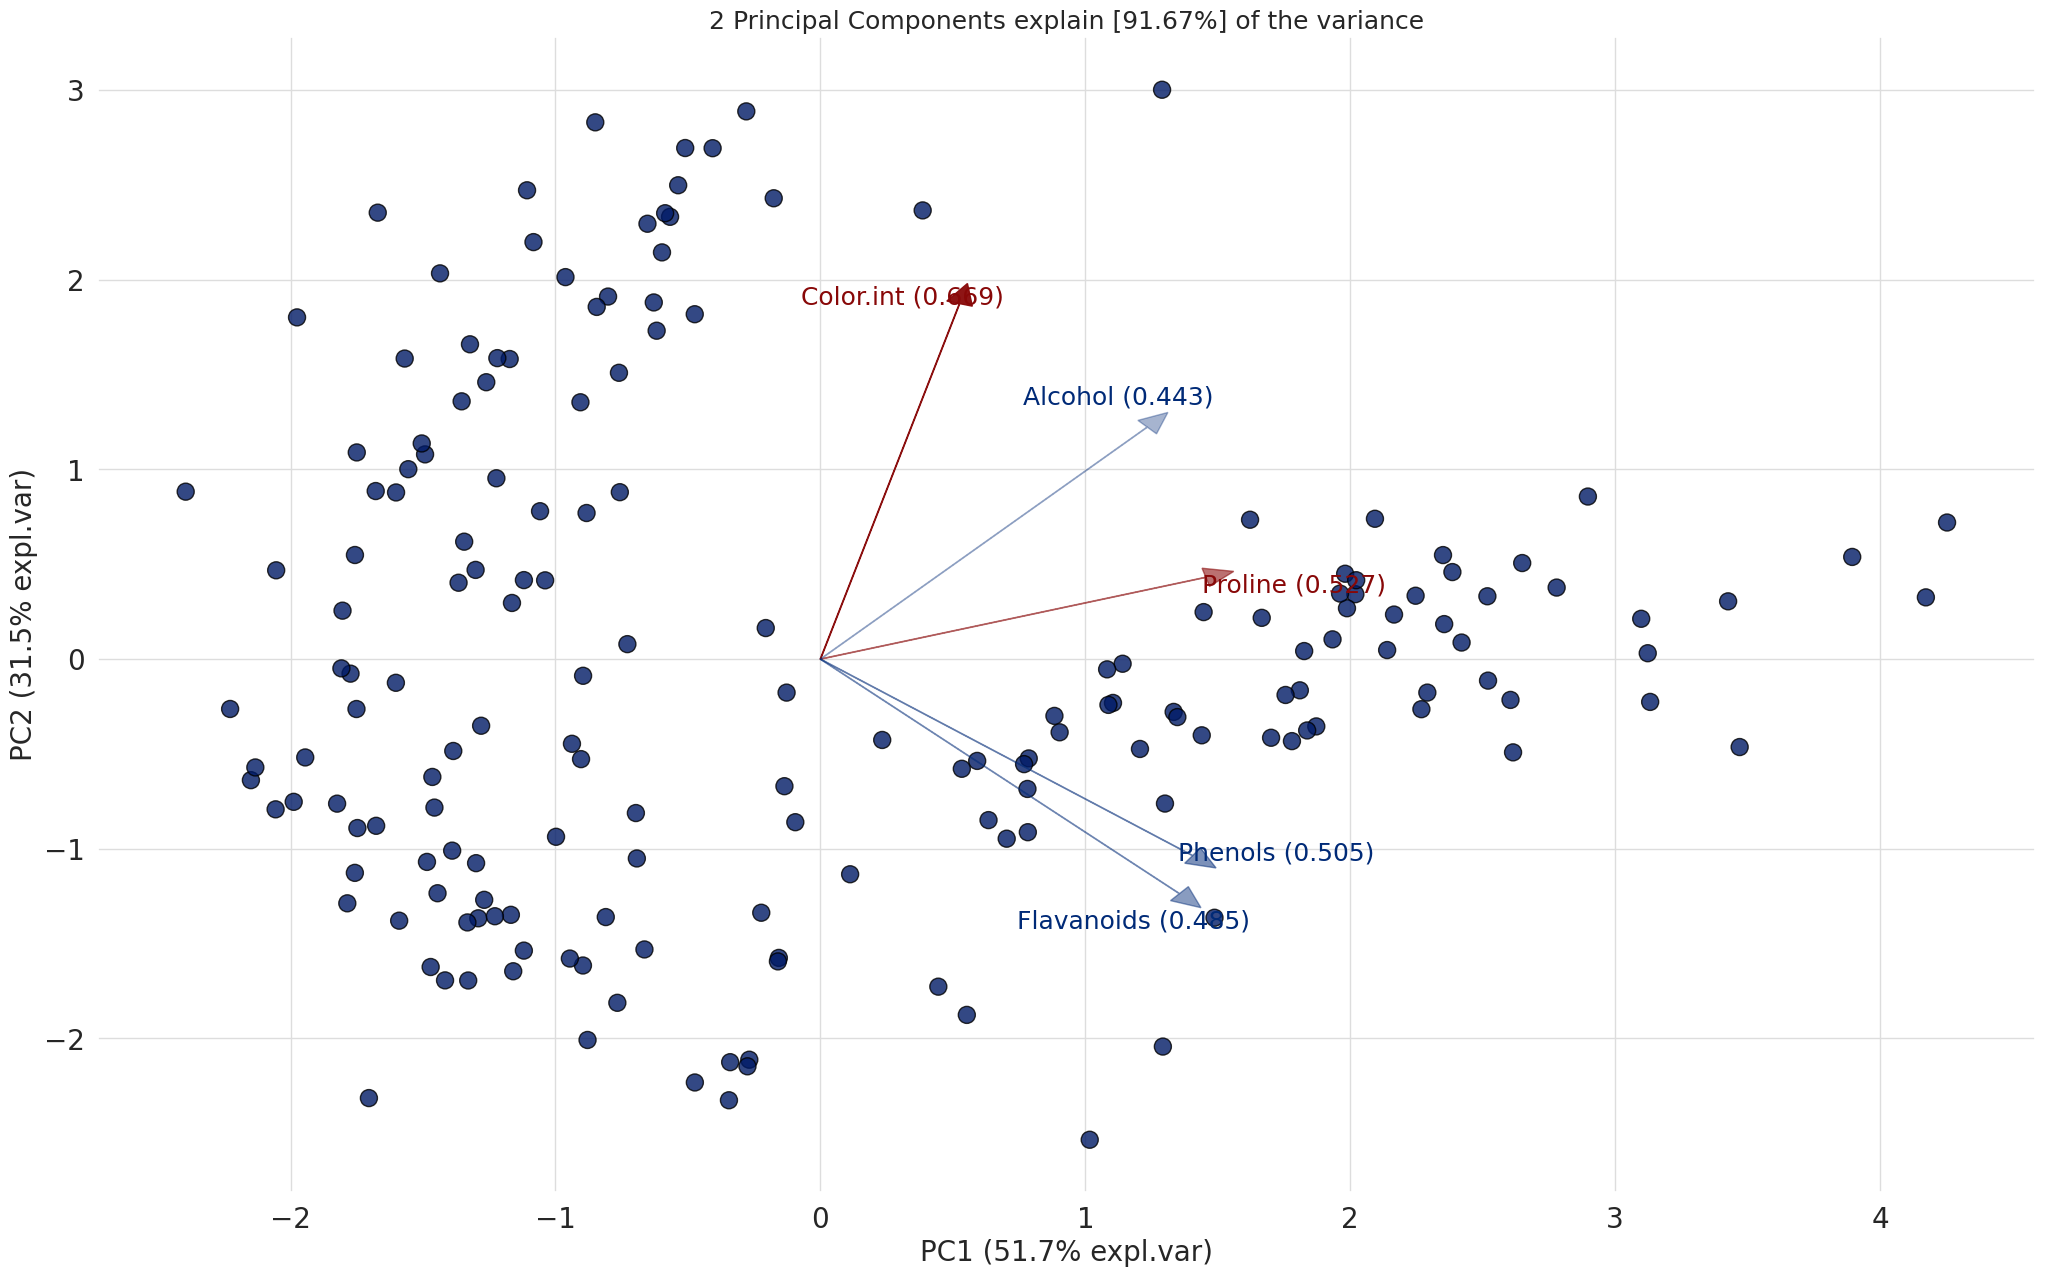

In [47]:
model.biplot(label=False, legend=False)

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Data Splitting**

In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [48]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (160, 14)
Unseen Data For Predictions: (18, 14)


**Setting up the Environment in PyCaret**

The **setup()** function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline.

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [49]:
from pycaret.classification import *
clf = setup(data=data, target='Wine', train_size=0.7, session_id=123)

**Comparing all Machine Learning Models**

In [50]:
 #show the best model and their statistics
 best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

For the remaining part of this project, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Random Forest classifier ('rf')
* Logistic Regression('lr')
* Naive Bayes ('nb')


**Create Decision Tree Classifier**

In [51]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [52]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [53]:
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [54]:
#tuned model object is stored in the variable 'tuned_rf'.
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**Evaluate Random Forest Classifier Model**

How to analyze model performance using various plots

In [58]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Logistic Regression**

In [56]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Logistic Regression Model**

In [57]:
tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Logistic Regression Model**

In [59]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Naive Bayes Model**

In [60]:
nb = create_model('nb')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [61]:
nb

GaussianNB(priors=None, var_smoothing=1e-09)

**Tune Logistic Regression Model**

In [62]:
tuned_nb = tune_model(nb)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Naive bayes Model**

In [63]:
tuned_nb

GaussianNB(priors=None, var_smoothing=2e-07)

In [64]:
evaluate_model(tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Tune the Best Model**

In [65]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [66]:
tuned_best_model

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [67]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Classification + PCA**

In [68]:
clf_pca = setup(data=df, target='Wine', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2)

In [69]:
rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [70]:
rf_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [71]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [72]:
tuned_rf_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [73]:
evaluate_model(tuned_rf_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

In [74]:
lr_pca = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [75]:
lr_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
tuned_lr_pca = tune_model(lr_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [77]:
tuned_lr_pca

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [82]:
nb_pca = create_model('nb')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [83]:
tuned_nb_pca = tune_model(nb_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [92]:
evaluate_model(tuned_nb_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [85]:
rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [86]:
rf_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [87]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

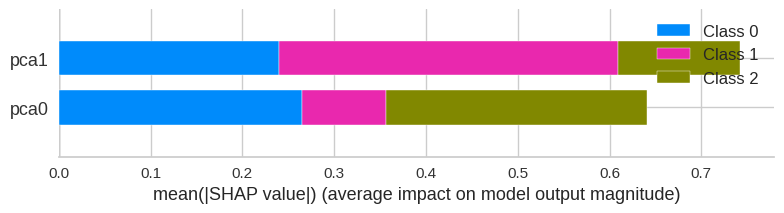

In [88]:
interpret_model(tuned_rf_pca, plot='summary')

In [89]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [90]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can see the "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [91]:
interpret_model(tuned_rf_pca, plot='reason')